# Anlysis of Diabetes data from a population of PIMA Indians
***
AIM: Analysing diabetes data  on a specific populations(PIMA Indians) and create a  model to predict onset of diabetes with in next five years from the study.


Source of the Data: Kaggle (It was originally available on University of California -Irvine)

In [113]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_diabetes 

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline, Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Before loading the data we can use Linux command line to take a peek
! head -n 2 ./datasets/diabetes.csv

In [4]:
# Looks fine. Load the data
pima = pd.read_csv("./datasets/diabetes.csv", header=0)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory Data Analysis on PIMA
***
**Points to note:**
- The outcome column records the onset of diabetes (1 for True) in the next five years since the study began. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16919bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a16d2ded0>]], dtype=object)

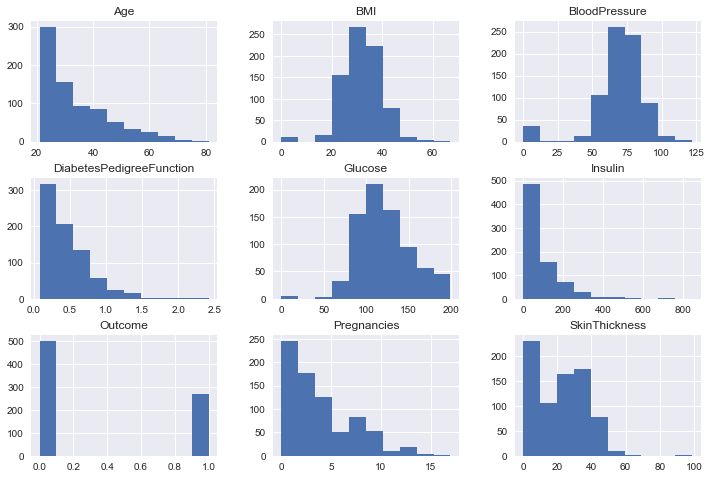

In [5]:
# Let's look at the distribution 
pima.hist(figsize=(12,8))

### Correlation between numerical Columns

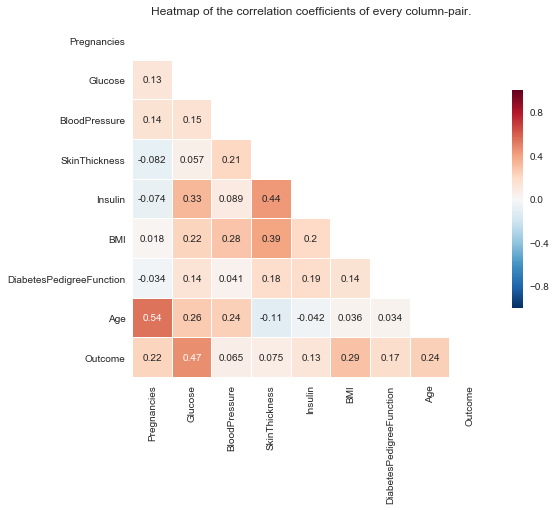

In [84]:
## Correlation Heatmap using Seaborn: Code based on the following
### https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(pima.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
sns.set_style('white')
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
axhm = sns.heatmap(pima.corr(), mask=mask, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
axhm.set_title("Heatmap of the correlation coefficients of every column-pair.")

#### Pair-plot of every column pair

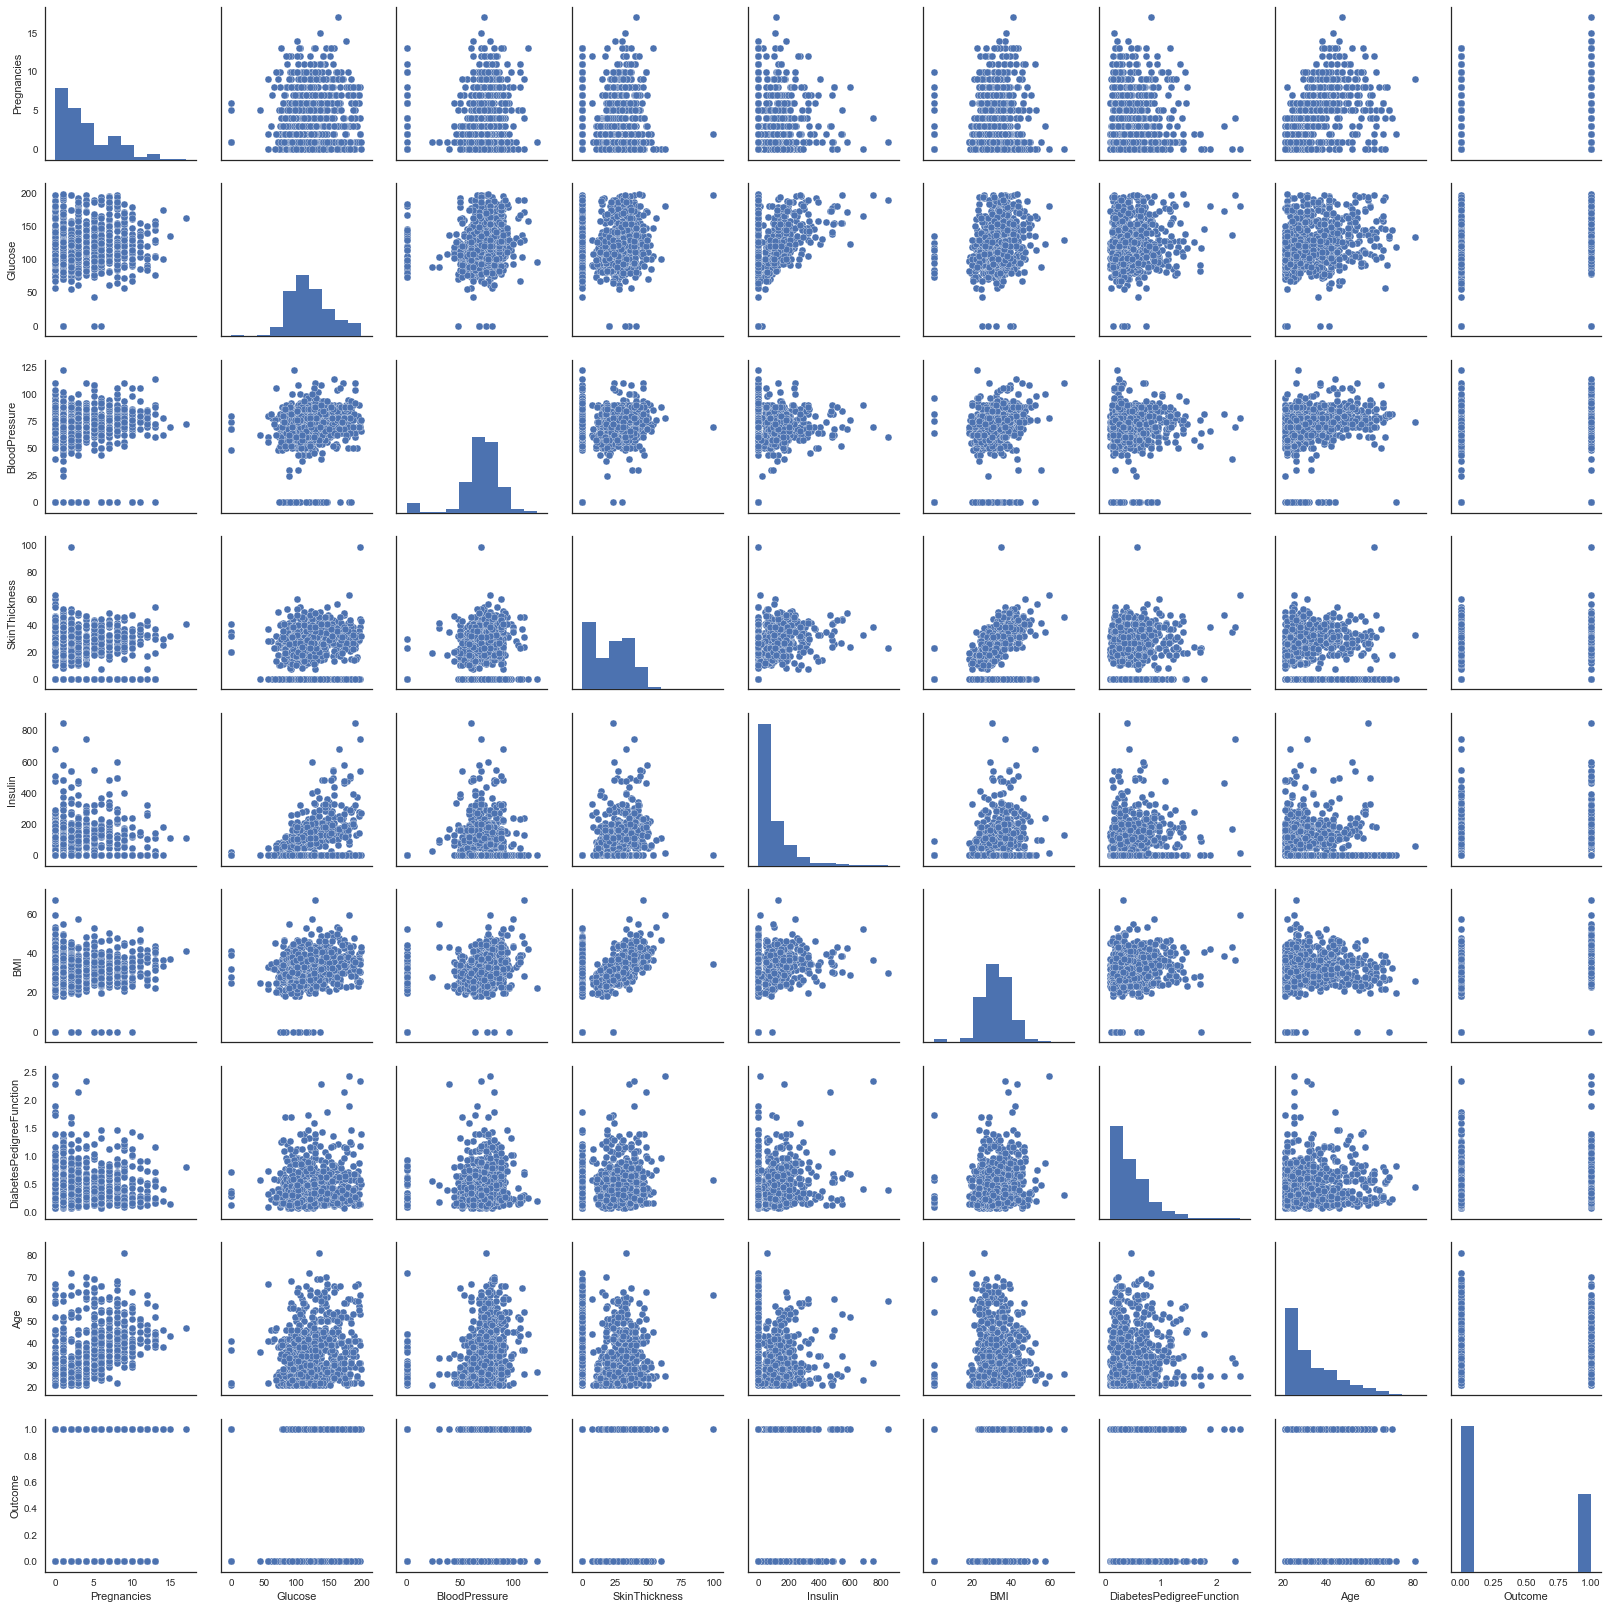

In [85]:
sns.pairplot(pima)

#### Outcome: the class distribution
***
- There is a definite imbalance in the dataset.
- Positive Outcome, 1: 35% and negative outcome, 0: 65%

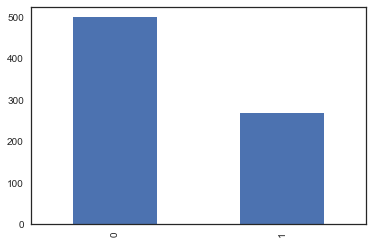

In [9]:
pima.Outcome.value_counts().plot(kind='bar')

#### Box-plot of every column grouped by Outcome
***
**Observations**
- Several of the features show substantive difference in the two classes of outcome.
- It would be interesting to apply hypothesis test two see if these variations are statistically significant.


"pima.boxplot(column='Pregnancies', by='Outcome', ax=ax1)\npima.boxplot(column='Glucose', by='Outcome', ax=ax2)\npima.boxplot(column='Pregnancies', by='Outcome', ax=ax3)\npima.boxplot(column='Pregnancies', by='Outcome', ax=ax4)\npima.boxplot(column='Pregnancies', by='Outcome', ax=ax5)\npima.boxplot(column='Pregnancies', by='Outcome', ax=ax6)\npima.boxplot(column='Insulin', by='Outcome', ax=ax7)"

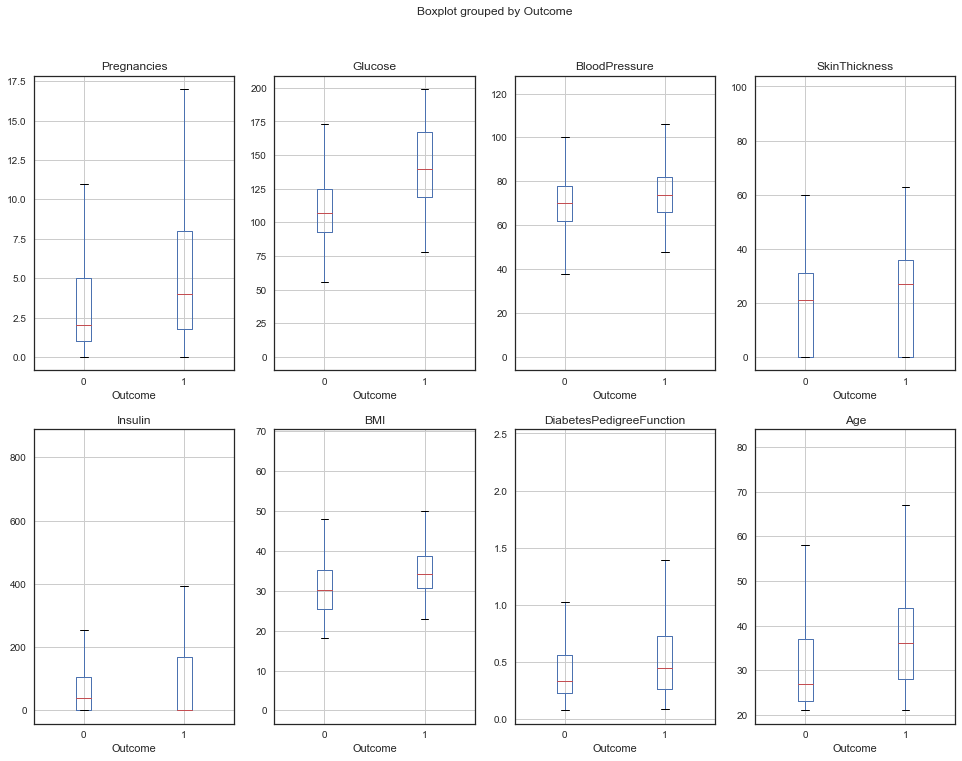

In [39]:
fig = plt.figure(figsize=(16,12))

# a dictionary for all the axis objects
ax = {}
i = 241
for col in list(pima.columns):
    if col=='Outcome':
        continue
    else:
        ax[col] = fig.add_subplot(str(i))
        i+=1;

for col in ax.keys():
        pima.boxplot(column=col, by='Outcome', ax=ax[col])
    

### Predictive Modeling on PIMA - Diabetes data
***
- As we hae limited data we will use all of it for training and cross-validation purpose.
- As our data is not balanced, we will use *stratified K-fold cross-validation*.
- We will make a pipe line of two steps. 
>- First for scaling of the data by MinMaxScaling.
>- And second for classification by Support Vector Machine and other algorithms.

In [41]:
# Fetch the data in a 2-D array and split for training and test
data = pima.values
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.3, random_state=100)

In [105]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)

#### Support Vector Machine

In [101]:
# Make a pipeline of two steps
pl = make_pipeline(MinMaxScaler(), SVC(kernel='linear', C=1, tol=0.00001))

# Train the Model and find all cross validation scores
scores = cross_validate(pl, data[:,:-1], data[:,-1], 
                        cv=skf, scoring=['accuracy', 'f1_macro']) # Other scoring function could be used too

ta =scores['test_accuracy']
print "Test Accuracy: ",
print ta

print("Mean accuracy: %0.4f (+/- %0.2f)" % (ta.mean(), ta.std() * 2))

Test Accuracy:  [ 0.7987013   0.77272727  0.79220779  0.7254902   0.74509804]
Mean accuracy: 0.7668 (+/- 0.06)


#### Logistic Regression

In [104]:
pl = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, tol=0.00001))
scores = cross_validate(pl, data[:,:-1], data[:,-1], 
                        cv=skf, scoring=['accuracy', 'f1_macro']) # Other scoring function could be used too
ta =scores['test_accuracy']
print "Test Accuracy: ",
print ta

print("Mean accuracy: %0.2f (+/- %0.2f)" % (ta.mean(), ta.std() * 2))

Test Accuracy:  [ 0.76623377  0.75974026  0.77272727  0.74509804  0.77777778]
Mean accuracy: 0.76 (+/- 0.02)


### GridSearch for Best paramters for Support Vector Classifier

In [108]:
# Pipe line with GridSearch
estimators = [('min_max_scalar', MinMaxScaler()), ('clf', SVC())]
pipe1 = Pipeline(estimators)

param_grid = dict(clf__kernel=['linear', 'rbf','poly'],
                  clf__C=[0.1, 1.0, 10, 100, 1000])
#Setup for grid-search
grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=5)

#train the models with grid search
grid_search.fit(data[:,:-1], data[:,-1])

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('min_max_scalar', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': [0.1, 1.0, 10, 100, 1000], 'clf__kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [109]:
print "Best Paramter Values: ", grid_search.best_params_
print "Best Score Values: ", grid_search.best_score_

Best Paramter Values:  {'clf__C': 1000, 'clf__kernel': 'poly'}
Best Score Values:  0.77734375


#### Running the model with best parameters
*** 
Please note that every prediction is from the case when a given row was part of the validation set.

In [114]:
# Make a pipeline of two steps
pl = make_pipeline(MinMaxScaler(), SVC(kernel='poly', C=1000, tol=0.00001))

# Train the Model and find all cross validation scores
predicted = cross_val_predict(pl, data[:,:-1], data[:,-1]) # Other scoring function could be used too

#### The classification report based on cross validation data

In [117]:
print classification_report(data[:,-1], predicted, target_names=["Negative Onset", "Positive Onset"])

                precision    recall  f1-score   support

Negative Onset       0.78      0.91      0.84       500
Positive Onset       0.75      0.51      0.61       268

   avg / total       0.77      0.77      0.76       768

